<a href="https://colab.research.google.com/github/SheikhMudassarHanif/NLP/blob/main/NerualNetTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow_hub as hub


In [3]:
df=pd.read_csv('/content/drive/MyDrive/wine-reviews.csv',usecols=['country','description','points','price','variety','winery'])

In [4]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,country,description,points,price,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


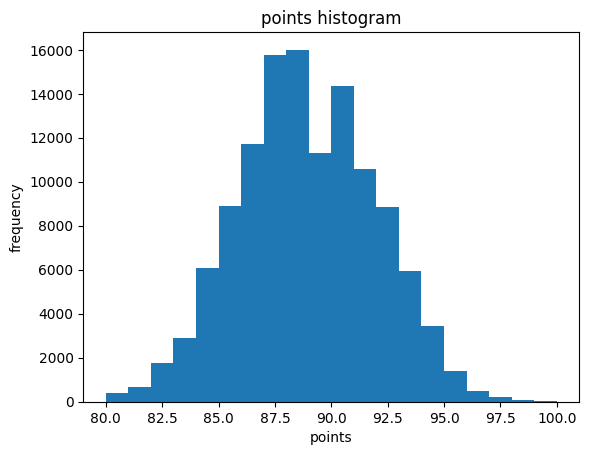

In [7]:
plt.hist(df.points,bins=20)
plt.title('points histogram')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

Nerual Net Examples using diabetes dataset


In [8]:
ddf=pd.read_csv('/content/diabetes.csv')
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


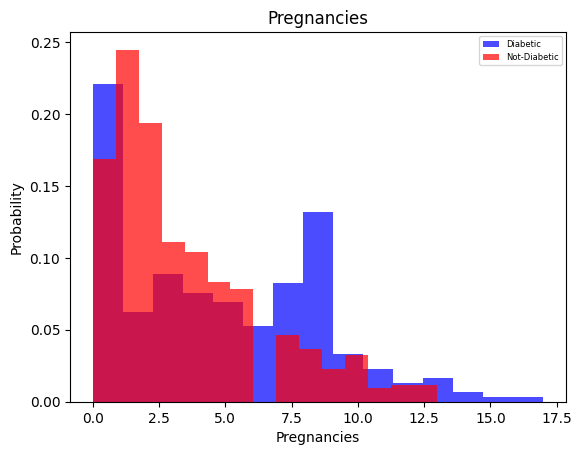

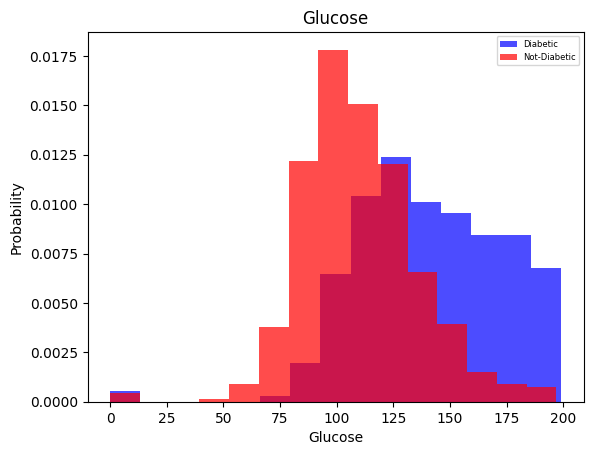

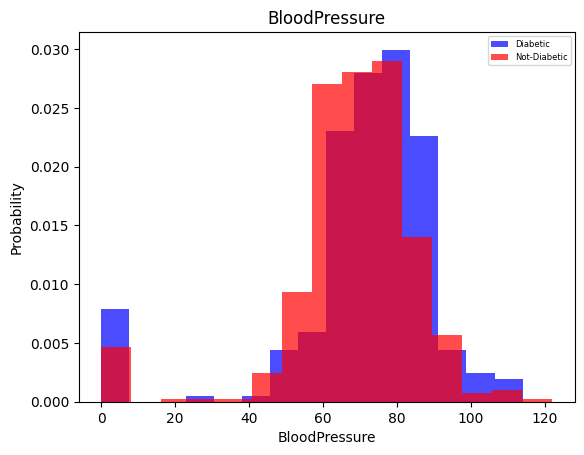

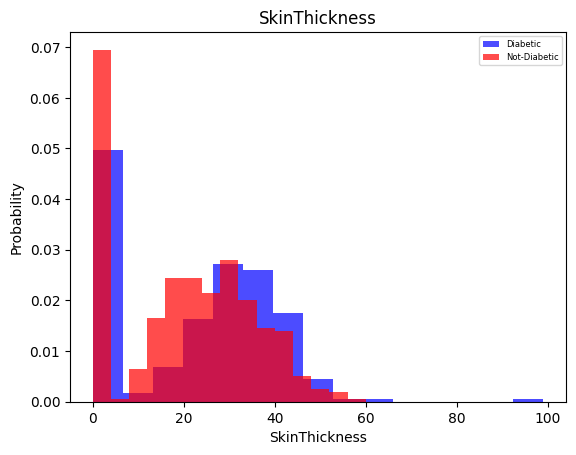

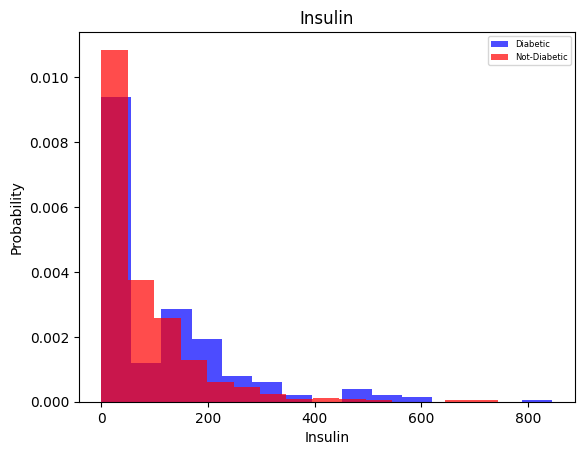

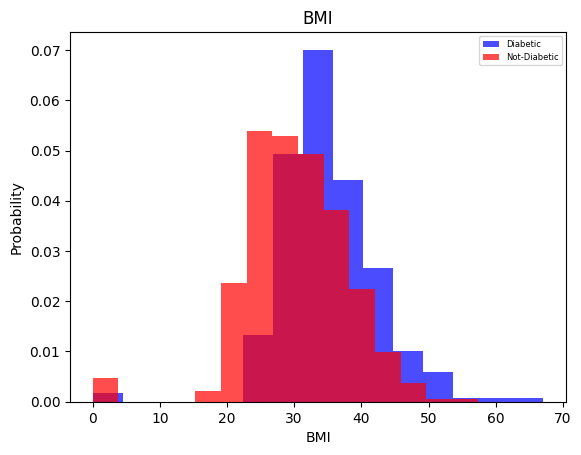

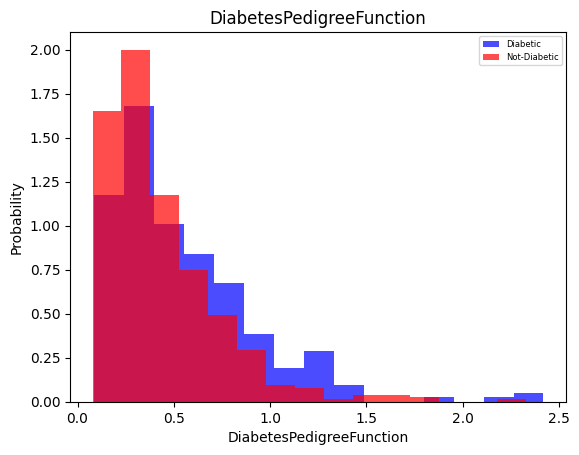

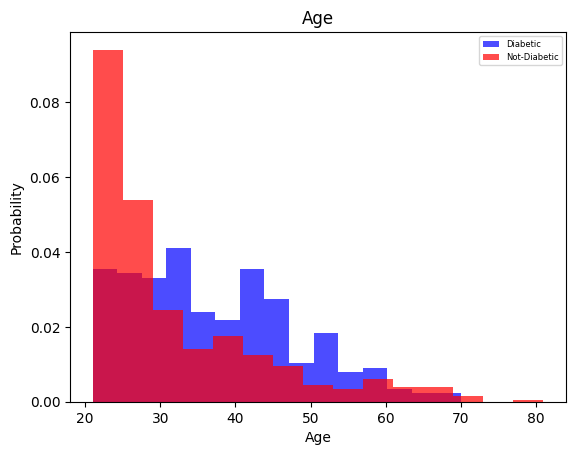

In [13]:
for i in range(len(ddf.columns[:-1])):
  label=ddf.columns[i]
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.hist(ddf[ddf['Outcome']==1][label],color='blue',label='Diabetic',alpha=0.7,density=True,bins=15)
  plt.hist(ddf[ddf['Outcome']==0][label],color='Red',label='Not-Diabetic',alpha=0.7,density=True,bins=15)
  plt.legend(prop={'size':6})
  plt.show()


Preparing the dataset into X and Y
X being the features and Y being the outcome

In [36]:
x=ddf[ddf.columns[:-1]].values
y=ddf[ddf.columns[-1]].values

In [37]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
# y=y.reshape(y.shape[0],1)

In [53]:
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_dataframe=pd.DataFrame(data,columns=ddf.columns)
# transformed_dataframe.head()

In [51]:
# for i in range(len(transformed_dataframe.columns[:-1])):
#   label=transformed_dataframe.columns[i]
#   plt.title(label)
#   plt.xlabel(label)
#   plt.ylabel('Probability')
#   plt.hist(transformed_dataframe[transformed_dataframe['Outcome']==1][label],color='blue',label='Diabetic',alpha=0.7,density=True,bins=15)
#   plt.hist(transformed_dataframe[transformed_dataframe['Outcome']==0][label],color='Red',label='Not-Diabetic',alpha=0.7,density=True,bins=15)
#   plt.legend(prop={'size':6})
#   plt.show()


In [54]:
len(transformed_dataframe[transformed_dataframe['Outcome']==1]),len(transformed_dataframe[transformed_dataframe['Outcome']==0])

(500, 500)

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)

now breaking them into test and train dataset

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0)

In [56]:
x_valid,x_test,y_valid,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

In [57]:
model=tf.keras.Sequential([
   tf.keras.layers.Dense(16,activation='relu'),
   tf.keras.layers.Dense(16,activation='relu'),
   tf.keras.layers.Dense(1,activation='sigmoid'),
                       ])

In [58]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [59]:
model.evaluate(x_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3933 - loss: 0.7451  


[0.7393103241920471, 0.41333332657814026]

In [62]:
model.evaluate(x_valid,y_valid)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7760 - loss: 0.4589 


[0.4736625552177429, 0.7720000147819519]

In [35]:
from sklearn.preprocessing import StandardScaler

In [61]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4111 - loss: 0.7305 - val_accuracy: 0.5620 - val_loss: 0.6844
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5827 - loss: 0.6781 - val_accuracy: 0.6920 - val_loss: 0.6491
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.6452 - val_accuracy: 0.7460 - val_loss: 0.6178
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.6176 - val_accuracy: 0.7440 - val_loss: 0.5885
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.5860 - val_accuracy: 0.7580 - val_loss: 0.5606
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7673 - loss: 0.5411 - val_accuracy: 0.7640 - val_loss: 0.5390
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7740 - loss: 0.5321 - val_accuracy: 0.7700 - val_loss: 0.5228
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7964 - loss: 0.4966 - val_accuracy: 0.7660 - val_loss:

In [63]:
model.evaluate(x_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7784 - loss: 0.4610


[0.47423189878463745, 0.7699999809265137]